In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os, glob, shutil

In [4]:
path = 'datasets/COVID19_Xray/'
train = os.listdir(path)

#possible labels
labels=["covid", "normal", "pneumonia"]
print (f'The labels are {labels}')

#image size
image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

images = []
tags = []
#Read all images via label
for label in labels:
    direc = os.path.join(path, label)
    class_num = labels.index(label)
    
    #for each image in folder
    for image in os.listdir(direc):
        #Read and greyscale and image
        image_read = cv.imread(os.path.join(direc,image))
        #Resize image
        image_resized = cv.resize(image_read,(image_size,image_size))
        #Add image to list
        images.append(image_resized)
        tags.append(class_num)
        
model = tf.keras.applications.MobileNetV2(include_top=False,
weights='imagenet', input_shape=(224, 224, 3))

images = np.array(images)

predictions = model.predict(images)

pred_images = predictions.reshape(images.shape[0], -1)

The labels are ['covid', 'normal', 'pneumonia']
All images to be resized into 224*224 pixels
9420800/9406464 [==============================] - 1s 0us/step


In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [11]:
k = 2
kf = KFold(n_splits=k, random_state=None)

acc_score = []

reg = per_clf = Perceptron()

counter = 0

for train_index , test_index in kf.split(pred_images):
    counter+=1
    X_train , X_test = pred_images[train_index,:],pred_images[test_index,:]
    y_train = []
    y_test = []
    
    for index in train_index:
        y_train.append(tags[index])
    
    for index in test_index:
        y_test.append(tags[index])
        
    reg.fit(X_train, y_train)
    
    pred_values = reg.predict(X_test)
    print(pred_values)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
    
    print(counter)
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

[2 2 2 ... 1 1 1]
1
[1 1 1 ... 0 0 0]
2
accuracy of each fold - [0.28452797202797203, 0.31613467424573677]
Avg accuracy : 0.3003313231368544


As the single perceptron is able to get a high accuracy on test data meaning that it can generalize to new data as well as my data being linearly sepratable as single perceptrons cannot solve the XOR problem.

In [5]:
from sklearn.neural_network import MLPClassifier
import random

In [6]:
train_data = []
train_tags = []

test_data = []
test_tags = []

for i in range(len(tags)):
    if random.randint(1, 100) <= 70:
        train_data.append(pred_images[i])
        train_tags.append(tags[i])
    else:
        test_data.append(pred_images[i])
        test_tags.append(tags[i])

In [7]:
clf = MLPClassifier().fit(train_data, train_tags)

In [8]:
correct_test = 0
correct_train = 0

for count in range(len(test_tags)):
    #calculates accuracy 
    if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
        correct_test += 1
        
for count in range(len(train_tags)):
    #calculates accuracy 
    if train_tags[count] == clf.predict(train_data[count].reshape(1, -1)):
        correct_train += 1
    
#Calculate percentage of correct guesses    
print("Correct Train: " + str(((correct_train/len(train_tags))*100)) + "%")
print("Correct Test: " + str(((correct_test/len(test_tags))*100)) + "%")

Correct Train: 100.0%
Correct Test: 92.22139117427075%


In [12]:
clf = Perceptron().fit(train_data, train_tags)

correct_test = 0
correct_train = 0

for count in range(len(test_tags)):
    #calculates accuracy 
    if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
        correct_test += 1
        
for count in range(len(train_tags)):
    #calculates accuracy 
    if train_tags[count] == clf.predict(train_data[count].reshape(1, -1)):
        correct_train += 1
    
#Calculate percentage of correct guesses    
print("Correct Train: " + str(((correct_train/len(train_tags))*100)) + "%")
print("Correct Test: " + str(((correct_test/len(test_tags))*100)) + "%")

Correct Train: 100.0%
Correct Test: 92.37097980553479%


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(test_data), test_tags)

0.9237097980553478

In [26]:
test = 0.001
accuracy = []
testarr = []

for counter in range(10):
    correct_test = 0
    clf = MLPClassifier(hidden_layer_sizes=3, early_stopping=True, batch_size=300, alpha=test).fit(train_data, train_tags)
    
    for count in range(len(test_tags)):
        #calculates accuracy 
        if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
            correct_test += 1
    accuracy.append(correct_test/len(test_tags)*100)
    testarr.append(test)
    
    test += 0.005
    print(test)

0.006
0.011
0.016
0.021
0.026000000000000002
0.031000000000000003
0.036000000000000004
0.041
0.046
0.051


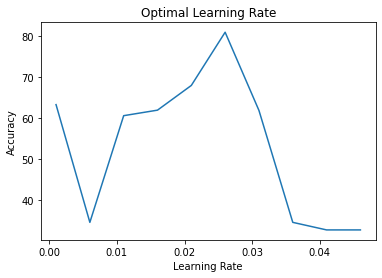

In [27]:
plt.plot(testarr, accuracy)
plt.title('Optimal Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

As you can see 0.026 is approxamatly the most optimal learning rate
‘identity’, ‘logistic’, ‘tanh’, ‘relu’

In [42]:
test = 0.001
accuracy = []
act = ["identity", "logistic", "tanh", "relu"]

for counter in range(len(act)):
    correct_test = 0
    clf = MLPClassifier(hidden_layer_sizes=3, early_stopping=True, batch_size=300, alpha=0.026, activation=act[counter],random_state=42).fit(train_data, train_tags)
    
    for count in range(len(test_tags)):
        #calculates accuracy 
        if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
            correct_test += 1
    accuracy.append(correct_test/len(test_tags)*100)
    testarr.append(test)
    print(counter)

0
1
2
3


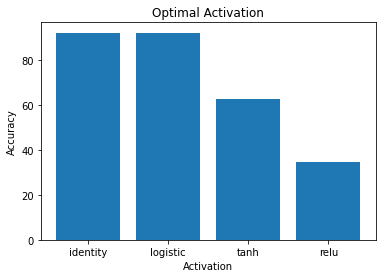

In [43]:
plt.bar(act, accuracy)
plt.title('Optimal Activation')
plt.xlabel('Activation')
plt.ylabel('Accuracy')
plt.show()

Either the logistic or Identity activation functions seem like they are by far the most optimal activation functions

In [30]:
print(accuracy)

[91.30127298444131, 32.814710042432814, 90.73550212164074, 32.814710042432814]


In [33]:
test = 2
accuracy = []
testarr = []

for counter in range(10):
    correct_test = 0
    clf = MLPClassifier(hidden_layer_sizes=test, early_stopping=True, batch_size=300, alpha=0.026).fit(train_data, train_tags)
    
    for count in range(len(test_tags)):
        #calculates accuracy 
        if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
            correct_test += 1
    accuracy.append(correct_test/len(test_tags)*100)
    testarr.append(test)
    
    test += 2
    print(test)

4
6
8
10
12
14
16
18
20
22


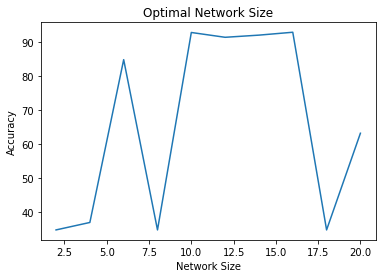

In [34]:
plt.plot(testarr, accuracy)
plt.title('Optimal Network Size')
plt.xlabel('Network Size')
plt.ylabel('Accuracy')
plt.show()

As seen from the graph above there is a clear optimal values at eiter 10 or 16 and as compute time increases with network size 10 is the more optimal option

0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


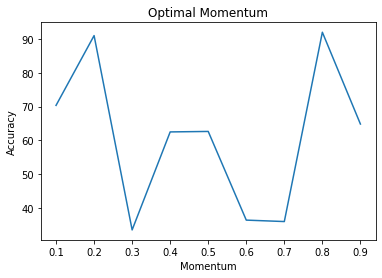

In [35]:
test = 0.1
accuracy = []
testarr = []

for counter in range(9):
    correct_test = 0
    clf = MLPClassifier(hidden_layer_sizes=10, solver="sgd", early_stopping=True, batch_size=300, alpha=0.026, momentum=test).fit(train_data, train_tags)
    
    for count in range(len(test_tags)):
        #calculates accuracy 
        if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
            correct_test += 1
    accuracy.append(correct_test/len(test_tags)*100)
    testarr.append(test)
    
    test += 0.1
    print(test)
    
plt.plot(testarr, accuracy)
plt.title('Optimal Momentum')
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.show()

The optimal momentum for this network is 0.8

In [40]:
clf = MLPClassifier(hidden_layer_sizes=10, solver="sgd", early_stopping=True, batch_size=300, alpha=0.026, momentum=0.8, random_state=42).fit(train_data, train_tags)

In [41]:
correct_test = 0
correct_train = 0

for count in range(len(test_tags)):
    #calculates accuracy 
    if test_tags[count] == clf.predict(test_data[count].reshape(1, -1)):
        correct_test += 1
        
for count in range(len(train_tags)):
    #calculates accuracy 
    if train_tags[count] == clf.predict(train_data[count].reshape(1, -1)):
        correct_train += 1
    
#Calculate percentage of correct guesses    
print("Correct Train: " + str(((correct_train/len(train_tags))*100)) + "%")
print("Correct Test: " + str(((correct_test/len(test_tags))*100)) + "%")

Correct Train: 94.36887061056628%
Correct Test: 90.5940594059406%


AttributeError: 'str' object has no attribute 'shape'

In [62]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.fit(x=images,y=tags,epochs=10)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})